In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
df = pd.read_csv(r'/Users/manueltanguma/Downloads/imdb_labelled.txt', sep='\t', header=None)

In [3]:
df.head(5)

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
df.columns = ['review', 'hit']

In [5]:
df.head(5)

,review,hit
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
columns_titles = ['hit', 'review']
df = df.reindex(columns=columns_titles)
df.head(5)

,hit,review
0,0,"A very, very, very slow-moving, aimless movie ..."
1,0,Not sure who was more lost - the flat characte...
2,0,Attempting artiness with black & white and cle...
3,0,Very little music or anything to speak of.
4,1,The best scene in the movie was when Gerardo i...


In [7]:
df.shape

(748, 2)

In [8]:
df['length']=df['review'].apply(len)
df.head(5)

,hit,review,length
0,0,"A very, very, very slow-moving, aimless movie ...",87
1,0,Not sure who was more lost - the flat characte...,99
2,0,Attempting artiness with black & white and cle...,188
3,0,Very little music or anything to speak of.,44
4,1,The best scene in the movie was when Gerardo i...,108


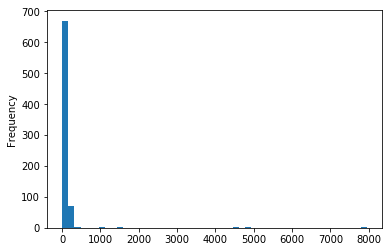

In [9]:
df['length'].plot(bins=50,kind='hist')

In [10]:
df.describe()

,hit,length
count,748.000000,748.000000
mean,0.516043,110.986631
std,0.500077,380.627728
min,0.000000,7.000000
25%,0.000000,42.750000
50%,1.000000,72.000000
75%,1.000000,112.250000
max,1.000000,7944.000000


In [11]:
keywords = ['best', 'awesome', 'great', 'stupendous', 'worthwhile', 'first-rate', 'insightful', 'clever',
            'enjoyable', 'riveting', 'absorbing', 'charming', 'comical', 'charismatic', 'original', 'tender',
            'hilarious', 'powerful', 'fascinating', 'legendary', 'imaginative']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [12]:
df.head(5)

,hit,review,length,best,awesome,great,stupendous,worthwhile,first-rate,insightful,...,charming,comical,charismatic,original,tender,hilarious,powerful,fascinating,legendary,imaginative
0,0,"A very, very, very slow-moving, aimless movie ...",87,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,Not sure who was more lost - the flat characte...,99,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,Attempting artiness with black & white and cle...,188,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,Very little music or anything to speak of.,44,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,The best scene in the movie was when Gerardo i...,108,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df['allcaps'] = df.review.str.isupper()

In [14]:
df.head(5)

,hit,review,length,best,awesome,great,stupendous,worthwhile,first-rate,insightful,...,comical,charismatic,original,tender,hilarious,powerful,fascinating,legendary,imaginative,allcaps
0,0,"A very, very, very slow-moving, aimless movie ...",87,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,Not sure who was more lost - the flat characte...,99,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,Attempting artiness with black & white and cle...,188,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,Very little music or anything to speak of.,44,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,The best scene in the movie was when Gerardo i...,108,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.dtypes

hit             int64
review         object
length          int64
best             bool
awesome          bool
great            bool
stupendous       bool
worthwhile       bool
first-rate       bool
insightful       bool
clever           bool
enjoyable        bool
riveting         bool
absorbing        bool
charming         bool
comical          bool
charismatic      bool
original         bool
tender           bool
hilarious        bool
powerful         bool
fascinating      bool
legendary        bool
imaginative      bool
allcaps          bool
dtype: object

In [16]:
df['hit'] = (df['hit'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [17]:
df.head(5)

,hit,review,length,best,awesome,great,stupendous,worthwhile,first-rate,insightful,...,comical,charismatic,original,tender,hilarious,powerful,fascinating,legendary,imaginative,allcaps
0,False,"A very, very, very slow-moving, aimless movie ...",87,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,Not sure who was more lost - the flat characte...,99,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,Attempting artiness with black & white and cle...,188,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,Very little music or anything to speak of.,44,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,The best scene in the movie was when Gerardo i...,108,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


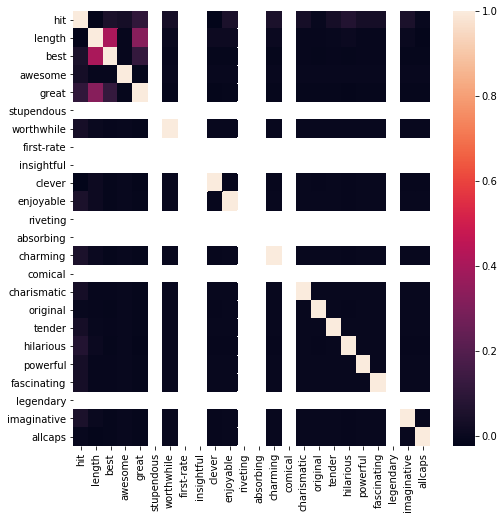

In [18]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr())

In [19]:
df.isnull().sum()

hit            0
review         0
length         0
best           0
awesome        0
great          0
stupendous     0
worthwhile     0
first-rate     0
insightful     0
clever         0
enjoyable      0
riveting       0
absorbing      0
charming       0
comical        0
charismatic    0
original       0
tender         0
hilarious      0
powerful       0
fascinating    0
legendary      0
imaginative    0
allcaps        0
dtype: int64

In [20]:
# data signifies the inputs x
# target signifies an outcome (y or dependent variable)
data = df[keywords + ['allcaps']]
target = df['hit']

In [21]:
data.shape

(748, 22)

In [22]:
target.shape

(748,)

In [23]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 347


In [24]:
# Now we're importing the Multinomial classifier to compare to the model above.
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
mnb = MultinomialNB()

# Fit our model to the data.
mnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = mnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 361


### test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [25]:
df_yelp = pd.read_csv(r'/Users/manueltanguma/Downloads/yelp_labelled.txt', sep='\t', header=None)

In [26]:
df_yelp.head(10)

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [27]:
df_yelp.columns = ['comments', 'try']

In [28]:
columns_heading = ['try', 'comments']
df_yelp = df_yelp.reindex(columns=columns_heading)
df_yelp.head(5)

,try,comments
0,1,Wow... Loved this place.
1,0,Crust is not good.
2,0,Not tasty and the texture was just nasty.
3,1,Stopped by during the late May bank holiday of...
4,1,The selection on the menu was great and so wer...


In [29]:
df_yelp['length']=df_yelp['comments'].apply(len)
df_yelp.head(5)

,try,comments,length
0,1,Wow... Loved this place.,24
1,0,Crust is not good.,18
2,0,Not tasty and the texture was just nasty.,41
3,1,Stopped by during the late May bank holiday of...,87
4,1,The selection on the menu was great and so wer...,59


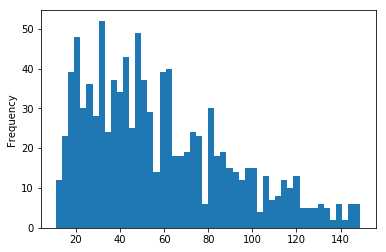

In [30]:
df_yelp['length'].plot(bins=50,kind='hist')

In [31]:
df_yelp.shape

(1000, 3)

In [32]:
df_yelp.describe()

,try,length
count,1000.00000,1000.00000
mean,0.50000,58.31600
std,0.50025,32.36414
min,0.00000,11.00000
25%,0.00000,33.00000
50%,0.50000,51.00000
75%,1.00000,80.00000
max,1.00000,149.00000


In [33]:
keywords_yelp = ['best', 'awesome', 'great', 'stupendous', 'worthwhile', 'first-rate', 'insightful', 'clever',
            'enjoyable', 'riveting', 'absorbing', 'charming', 'comical', 'charismatic', 'original', 'tender',
            'hilarious', 'powerful', 'fascinating', 'legendary', 'imaginative', 'acclaimed', 'affordable', 'best',
                'better', 'celebrated', 'charming', 'chic', 'elegant', 'excellent', 'exclusive', 'fabulous',
                'famous', 'favorite', 'finest', 'friendly', 'good', 'great', 'new', 'nicest', 'stylish', 'superb',
                'trendy', 'wonderful', 'loved', 'love']

for key in keywords_yelp:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_yelp[str(key)] = df_yelp.comments.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [34]:
df_yelp['allcaps'] = df_yelp.comments.str.isupper()

In [35]:
df_yelp.head(5)

,try,comments,length,best,awesome,great,stupendous,worthwhile,first-rate,insightful,...,good,new,nicest,stylish,superb,trendy,wonderful,loved,love,allcaps
0,1,Wow... Loved this place.,24,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,Crust is not good.,18,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,Not tasty and the texture was just nasty.,41,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Stopped by during the late May bank holiday of...,87,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,The selection on the menu was great and so wer...,59,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df_yelp['try'] = (df_yelp['try'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [37]:
df_yelp.head(5)

,try,comments,length,best,awesome,great,stupendous,worthwhile,first-rate,insightful,...,good,new,nicest,stylish,superb,trendy,wonderful,loved,love,allcaps
0,True,Wow... Loved this place.,24,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,Crust is not good.,18,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,Not tasty and the texture was just nasty.,41,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,Stopped by during the late May bank holiday of...,87,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,The selection on the menu was great and so wer...,59,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


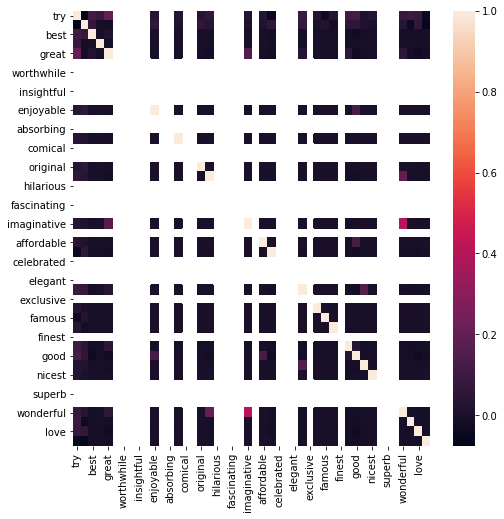

In [38]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_yelp.corr())

In [39]:
# data signifies the inputs x
# target signifies an outcome (y or dependent variable)
data_yelp = df_yelp[keywords + ['allcaps']]
target_yelp = df_yelp['try']

In [40]:
data_yelp.shape

(1000, 22)

In [41]:
target_yelp.shape

(1000,)

In [43]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_yelp, target_yelp)

# Classify, storing the result in a new variable.
y_pred_yelp = bnb.predict(data_yelp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target_yelp != y_pred_yelp).sum()
))

Number of mislabeled points out of a total 1000 points : 436


In [44]:
# Now we're importing the Multinomial classifier to compare to the model above.
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
mnb = MultinomialNB()

# Fit our model to the data.
mnb.fit(data_yelp, target_yelp)

# Classify, storing the result in a new variable.
y_pred_yelp = mnb.predict(data_yelp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target_yelp != y_pred_yelp).sum()
))

Number of mislabeled points out of a total 1000 points : 439
